<img src="./imagenes/encabezado.png" ><br>

# MINE-4101: Ciencia de Datos Aplicada
## Universidad de los Andes
Segundo Semestre - 2023


## Estudiante

*   Ivan Camilo Delgado Cañon


# ENTREGA TALLER 1 

## Análisis Exploratorio de Datos


### Contexto de negocio: Inversiones inmobiliarias para alquiler vacacional

Como consultor científico de datos especializado en el sector inmobiliario, el objetivo es ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través de la plataforma Airbnb. Con la creciente popularidad de este modelo de negocio, es cada vez más difícil hacer buenas elecciones de sectores de la ciudad y tipos de propiedades,
entre otro tipo de factores, para lograr una rentabilidad adecuada a lo largo del tiempo la cual puede estar dada en términos de una alta tasa de ocupación y un precio por noche que los usuarios estarían dispuestos a pagar.

Para este fin se le ha proporcionado un dataset de propiedades listadas en AirBnb para una ciudad específica. Por cada propiedad se encuentran atributos como ubicación, detalles del host, tipo de propiedad, precio, disponibilidad futura, calificaciones, entre otros.

Mediante el uso de técnicas estadísticas y de visualización de datos se espera descubrir patrones, tendencias y oportunidades que puedan ser de interés para un inversionista.

## 1. Selección del dataset de trabajo

El dataset seleccionado para realizar el trabajo es el de la ciudad de Austin, Texas.

**Fuente de Datos**: AirBnb Listings - Austin, Texas, United States [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)].

### 1.1. Obtener los datos

**Importar las librerías requeridas**

In [1]:
# Data management Libraries
import pandas as pd
import numpy as np

# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
import re
import string
import math
from pandas.plotting import table
from matplotlib.backends.backend_pdf import PdfPages

**Lectura de los datos**

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [3]:
# DataFrame 
dataframe = pd.read_csv('./data/listings.csv')

In [4]:
# Data visualization
dataframe.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,354569,https://www.airbnb.com/rooms/354569,20230610213056,2023-06-11,previous scrape,Home in Austin · ★5.0 · 2 bedrooms · 2 beds · ...,"Spacious, open and bright, & in the heart of e...",Private and secluded but less than 3 minutes f...,https://a0.muscache.com/pictures/127a1ad3-9520...,2049988,https://www.airbnb.com/users/show/2049988,Mike,2012-04-01,"Austin, TX",I enjoy living on the fringe of everything fun...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/2049988/profi...,https://a0.muscache.com/im/users/2049988/profi...,Old Enfield,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78703,NaN,30.28885,-97.76001,Entire home,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""Essentials"", ""Shampoo"", ""Hair dryer"", ""TV"", ...",$248.00,3,100,3.0,3.0,100.0,100.0,3.0,100.0,NaN,t,0,0,0,0,2023-06-11,11,0,0,2012-03-15,2017-07-05,5.00,5.00,5.00,5.0,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
1,5456,https://www.airbnb.com/rooms/5456,20230610213056,2023-06-11,city scrape,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, TX",I am a licensed Real Estate Broker and owner o...,within a few hours,100%,95%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,4.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78702,NaN,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""HDTV with Amazon Prime Video, HBO Max, Hulu,...",$107.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,23,53,83,341,2023-06-11,648,45,5,2009-03-08,2023-06-04,4.84,4.87,4.85,4.9,4.82,4.72,4.79,NaN,f,1,1,0,0,3.73
2,355176,https://www.airbnb.com/rooms/355176,20230610213056,2023-06-11,previous scrape,Rental unit in Austin · ★4.85 · 1 bedroom · 1 ...,Private Guest house 4 miles from the Downtown ...,Our neighborhood is very safe with lots of wal...,https://a0.muscache.com/pictures/3950693/82e0f...,1798140,https://www.airbnb.com/users/show/1798140,Scott,2012-02-23,"Austin, TX","I enjoy hanging out with friends, running, lea...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1798140/profi...,https://a0.muscache.com/im/users/1798140/profi...,South Manchaca,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78745,NaN,30.22187,-97.77470,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Smoking allowed"", ""Essentials"", ""Microwave"",...",$110.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,0,0,2023-06-11,21,0,0,2012-03-15,2021-05-02,4.85,4.90,4.55

## 2. Entendimiento inicial de datos

En este paso se hace una análisis más detallado de los datos para poder identificar las dimensiones del dataset, los tipos de datos que contiene y el top 5 de los atributos que se consideran más importantes para el análisis. 

### 2.1. Análisis inicial de los datos (REPORTE)

**Dimensiones del dataset**

Con la propiedad **shape** del dataframe se pueden visualizar sus dimensiones las cuales son:

In [5]:
dataframe.shape

(14694, 75)

Estas equivalen a 14.694 registros y 75 columnas.

**Tipos de dato del dataset**

Podemos hacer uso del método **info()** del dataframe el cual nos proporciona información más detallada de los datos cargados. Esta información nos ayuda a identificar algunas características iniciales, por ejemplo el tipo de dato, si el campo tiene dato o tiene valor null y finalmente el peso total del dataset en memoria.

In [6]:
# Showing dataframe information
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14694 non-null  int64  
 1   listing_url                                   14694 non-null  object 
 2   scrape_id                                     14694 non-null  int64  
 3   last_scraped                                  14694 non-null  object 
 4   source                                        14694 non-null  object 
 5   name                                          14694 non-null  object 
 6   description                                   14566 non-null  object 
 7   neighborhood_overview                         9009 non-null   object 
 8   picture_url                                   14693 non-null  object 
 9   host_id                                       14694 non-null 

Con el método **info()** podemos identificar que en el dataset hay 4 columnas que no tienen ningún dato: **neighbourhood_group_cleansed, bathrooms, calendar_updated y license**.

**Diccionario de Datos proporcionado**

<b>id:</b> Airbnb's unique identifier for the listing.<br>
<b>listing_url:</b> URL of the listing on Airbnb's platform.<br>
<b>scrape_id:</b> Inside Airbnb "Scrape" this was part of.<br>
<b>last_scraped:</b> UTC. The date and time this listing was "scraped".<br>
<b>source:</b> One of "neighbourhood search" or "previous scrape". "neighbourhood search" means that the listing was found by searching the city, while "previous scrape" means that the listing was seen in another scrape performed in the last 65 days, and the listing was confirmed to be still available on the Airbnb site.<br>
<b>name:</b> Name of the listing.<br>
<b>description:</b> Detailed description of the listing.<br>
<b>neighborhood_overview:</b> Host's description of the neighbourhood.<br>
<b>picture_url:</b> URL to the Airbnb hosted regular sized image for the listing.<br>
<b>host_id:</b> Airbnb's unique identifier for the host/user.<br>
<b>host_url:</b> The Airbnb page for the host.<br>
<b>host_name:</b> Name of the host. Usually just the first name(s).<br>
<b>host_since:</b> The date the host/user was created. For hosts that are Airbnb guests, this could be the date they registered as a guest.<br>
<b>host_location:</b> The host's self-reported location.<br>
<b>host_about:</b> Description about the host.<br>
<b>host_response_time:</b> N/A<br>
<b>host_response_rate:</b> N/A<br>
<b>host_acceptance_rate:</b> That rate at which a host accepts booking requests.<br>
    <b>host_is_superhost:</b> Whether the host is a superhost.<br>
<b>host_thumbnail_url:</b> URL of the host's thumbnail image.<br>
<b>host_picture_url:</b> URL of the host's picture.<br>
<b>host_neighbourhood:</b> Host's reported neighborhood.<br>
<b>host_listings_count:</b> The number of listings the host has (per Airbnb calculations).<br>
<b>host_total_listings_count:</b> The total number of listings the host has (per Airbnb calculations).<br>
<b>host_verifications:</b> Verification methods used by the host.<br>
<b>host_has_profile_pic:</b> Whether the host has a profile picture (N/A if empty).<br>
<b>host_identity_verified:</b> Whether the host's identity is verified (N/A if empty).<br>
<b>neighbourhood:</b> Neighbourhood.<br>
<b>neighbourhood_cleansed:</b> The neighbourhood as geocoded using latitude and longitude against neighborhoods as defined by open or public digital shapefiles.<br>
<b>neighbourhood_group_cleansed:</b> The neighbourhood group as geocoded using latitude and longitude against neighborhoods as defined by open or public digital shapefiles.<br>
<b>latitude:</b> Latitude using the World Geodetic System (WGS84) projection.<br>
<b>longitude:</b> Longitude using the World Geodetic System (WGS84) projection.<br>
<b>property_type:</b> Self-selected property type.<br>
<b>room_type:</b> Type of room (Entire home/apt, Private room, Shared room, Hotel).<br>
<b>accommodates:</b> The maximum capacity of the listing.<br>
<b>bathrooms:</b> The number of bathrooms in the listing.<br>
<b>bathrooms_text:</b> The number of bathrooms in textual description.<br>
<b>bedrooms:</b> The number of bedrooms.<br>
<b>beds:</b> The number of bed(s).<br>
<b>amenities:</b> Amenities provided.<br>
<b>price:</b> Daily price in local currency.<br>
<b>minimum_nights:</b> Minimum number of nights for the listing (calendar rules may be different).<br>
<b>maximum_nights:</b> Maximum number of nights for the listing (calendar rules may be different).<br>
<b>minimum_minimum_nights:</b> The smallest minimum_night value from the calendar (looking 365 nights in the future).<br>
<b>maximum_minimum_nights:</b> The largest minimum_night value from the calendar (looking 365 nights in the future).<br>
<b>minimum_maximum_nights:</b> The smallest maximum_night value from the calendar (looking 365 nights in the future).<br>
<b>maximum_maximum_nights:</b> The largest maximum_night value from the calendar (looking 365 nights in the future).<br>
<b>minimum_nights_avg_ntm:</b> The average minimum_night value from the calendar (looking 365 nights in the future).<br>
<b>maximum_nights_avg_ntm:</b> The average maximum_night value from the calendar (looking 365 nights in the future).<br>
<b>calendar_updated:</b> Information about the calendar update.<br>
<b>has_availability:</b> Availability status (true/false).<br>
<b>availability_30:</b> Availability of the listing 30 days in the future.<br>
<b>availability_60:</b> Availability of the listing 60 days in the future.<br>
<b>availability_90:</b> Availability of the listing 90 days in the future.<br>
<b>availability_365:</b> Availability of the listing 365 days in the future.<br>
<b>calendar_last_scraped:</b> Date when the calendar was last scraped.<br>
<b>number_of_reviews:</b> The number of reviews the listing has.<br>
<b>number_of_reviews_ltm:</b> The number of reviews the listing has in the last 12 months.<br>
<b>number_of_reviews_l30d:</b> The number of reviews the listing has in the last 30 days.<br>
<b>first_review:</b> Date of the first/oldest review.<br>
<b>last_review:</b> Date of the last/newest review.<br>
<b>review_scores_rating:</b> Review scores for rating.<br>
<b>review_scores_accuracy:</b> Review scores for accuracy.<br>
<b>review_scores_cleanliness:</b> Review scores for cleanliness.<br>
<b>review_scores_checkin:</b> Review scores for check-in process.<br>
<b>review_scores_communication:</b> Review scores for communication.<br>
<b>review_scores_location:</b> Review scores for location.<br>
<b>review_scores_value:</b> Review scores for value.<br>
<b>license:</b> The licence/permit/registration number.<br>
<b>instant_bookable:</b> Whether the guest can automatically book the listing without the host requiring to accept their booking request (true/false).<br>
<b>calculated_host_listings_count:</b> The number of listings the host has in the current scrape, in the city/region geography.<br>
<b>calculated_host_listings_count_entire_homes:</b> The number of Entire home/apt listings the host has in the current scrape, in the city/region geography.<br>
<b>calculated_host_listings_count_private_rooms:</b> The number of Private room listings the host has in the current scrape, in the city/region geography.<br>
<b>calculated_host_listings_count_shared_rooms:</b> The number of Shared room listings the host has in the current scrape, in the city/region geography.<br>
<b>reviews_per_month:</b> The number of reviews the listing has over the lifetime of the listing.<br>

## Top 5 atributos más importantes para el análisis

Para identificar los atributos más importantes, hacemos uso de la información obtenida anteriormente y también del diccionario de datos para identificar los atributos más apropiados para el análisis. Para este caso se seleccionaron los siguientes:

### Variables Cuantitativas
**Discretas**
* **accommodates:** Este atributo es de mucha utilidad ya que nos permite conocer la capacidad máxima del alojamiento y nos puede dar una idea de que tipos de alojamiento son más utilizados por los usuarios cuando hagamos el análisis.<br/>
* **number_of_reviews:** Sirve para evaluar la cantidad de calificaciones y su distribución.<br/>
* **availability_365:** Nos ayudara a tener una idea de que tan utilizada es la propiedad por parte de los usuario en un periodo de tiempo (1 año).<br/>

**Continuas**
* **price:** Sirve para analizar las diferencias de precios entre propiedades.<br/>


### Variables Cualitativas (categóricas)

* **neighbourhood_cleansed:** Inicialmente se había decidió utilizar el atributo **neighbourhood** para identificar pequeños bloques poblacionales, pero debido a que cerca de un 38 % de sus campos no tiene el dato, se optó por utilizar **neighbourhood_cleansed** el cual hace referencia en este dataset al código zip, este código nos permitirá identificar la ubicación de pequeños bloques poblacionales donde se encuentran ubicadas las propiedades que se van a evaluar.<br/>

### Análisis Univariado

A continuación se realizará un análisis inicial para cada uno de los atributos seleccionados.

In [7]:
# Information of the top 5 attributes
dataframe[['accommodates', 'neighbourhood_cleansed', 'number_of_reviews', 'availability_365', 'price']]

,accommodates,neighbourhood_cleansed,number_of_reviews,availability_365,price
0,6,78703,11,0,$248.00
1,3,78702,648,341,$107.00
2,2,78745,21,0,$110.00
3,2,78705,1,363,$99.00
4,7,78704,3,365,"$1,000.00"
...,...,...,...,...,...
14689,5,78733,0,363,$521.00
14690,2,78721,0,327,$68.00
14691,6,78702,0,82,$296.00
14692,4,78702,0,87,$223.00


In [8]:
# Information of the top 5 attributes
dataframe[['accommodates', 'neighbourhood_cleansed', 'number_of_reviews', 'availability_365', 'price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   accommodates            14694 non-null  int64 
 1   neighbourhood_cleansed  14694 non-null  int64 
 2   number_of_reviews       14694 non-null  int64 
 3   availability_365        14694 non-null  int64 
 4   price                   14694 non-null  object
dtypes: int64(4), object(1)
memory usage: 574.1+ KB


Como podemos observar no hay atributos con valor null, pero si con valor cero, debemos tener esto en cuenta al realizar la limpieza de los datos.

### Accommodates

Capacidad máxima del alojamiento

In [9]:
# Showing unique values of accommodates
dataframe["accommodates"].unique()

array([ 6,  3,  2,  7, 12,  9,  5, 10,  4, 16,  1,  8, 14, 15, 13, 11,  0],
      dtype=int64)

Text(0.5, 1.0, 'Accommodates Distribution')

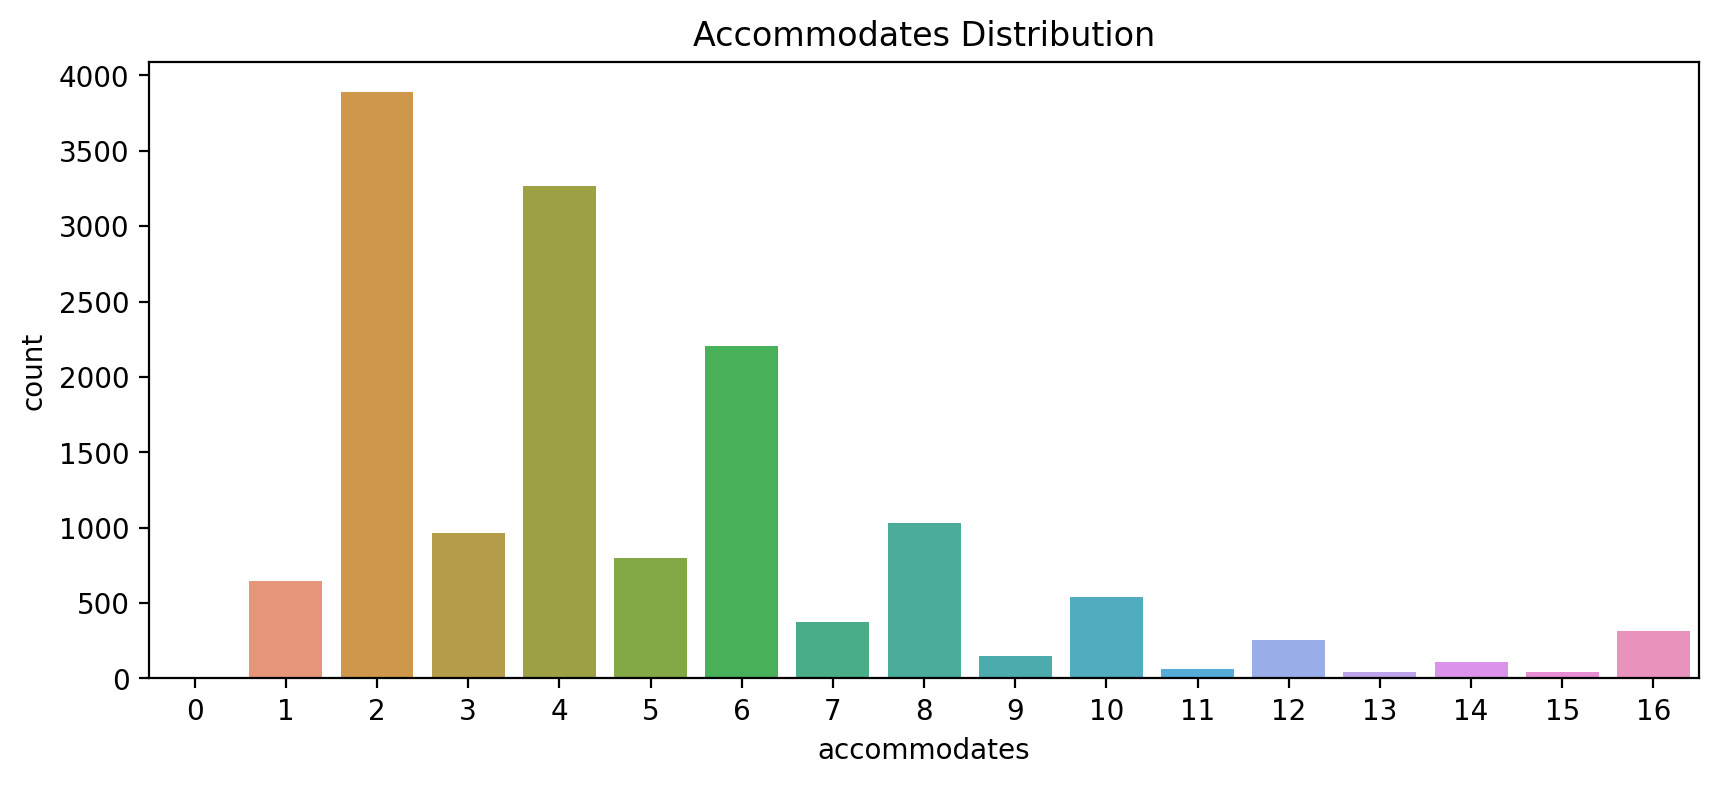

In [10]:
# Plotting a count plot for room types
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='accommodates', data=dataframe)
plt.title("Accommodates Distribution")

In [11]:
# Calculating basic statistics for accommodates
dataframe['accommodates'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    14694.000000
mean         4.810263
std          3.188267
min          0.000000
5%           2.000000
25%          2.000000
50%          4.000000
75%          6.000000
95%         12.000000
max         16.000000
Name: accommodates, dtype: float64

In [12]:
# Seen how many values are cero
value_counts = dataframe["accommodates"].value_counts()
value_counts.get(0, 0)

2

### Neighbourhood cleansed (Zip code)

Código zip de las localidades de Austin.

In [13]:
# Showing unique values of neighbourhood cleansed
dataframe["neighbourhood_cleansed"].unique()

array([78703, 78702, 78745, 78705, 78704, 78729, 78756, 78723, 78741,
       78746, 78701, 78725, 78751, 78749, 78757, 78727, 78731, 78758,
       78759, 78721, 78722, 78733, 78754, 78752, 78736, 78734, 78737,
       78744, 78738, 78748, 78726, 78724, 78753, 78735, 78732, 78730,
       78728, 78739, 78717, 78750, 78747, 78712, 78719, 78742],
      dtype=int64)

In [14]:
# Showing the number of unique values of neighbourhood cleansed
len(dataframe["neighbourhood_cleansed"].unique())

44

## Mapa de Austin dividido por códigos zip

<img src="./imagenes/austin_zip_code_map.jpg" width="50%" height="50%"><br>

In [15]:
# Calculating the absolute frecuency of neighbourhood cleansed
dataframe["neighbourhood_cleansed"].value_counts(dropna=False, normalize=False)

78704    2274
78702    1769
78701     965
78741     958
78745     721
78703     672
78705     610
78751     552
78723     508
78758     454
78744     408
78721     404
78734     361
78746     277
78722     271
78752     250
78757     247
78748     218
78724     202
78756     198
78753     192
78727     188
78737     183
78729     183
78731     176
78759     161
78754     159
78749     159
78728     122
78747     112
78725      90
78733      89
78750      87
78732      82
78738      77
78736      75
78717      68
78735      52
78739      41
78730      40
78726      15
78719      14
78742       8
78712       2
Name: neighbourhood_cleansed, dtype: int64

### Number of reviews

Número de reseñas que tiene el alojamiento.

In [16]:
# Calculating basic statistics for number of reviews
dataframe['number_of_reviews'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    14694.000000
mean        37.133048
std         78.488266
min          0.000000
5%           0.000000
25%          1.000000
50%          9.000000
75%         36.000000
95%        178.000000
max       1124.000000
Name: number_of_reviews, dtype: float64

In [17]:
# Seen how many values are cero
value_counts = dataframe["number_of_reviews"].value_counts()
value_counts.get(0, 0)

2967

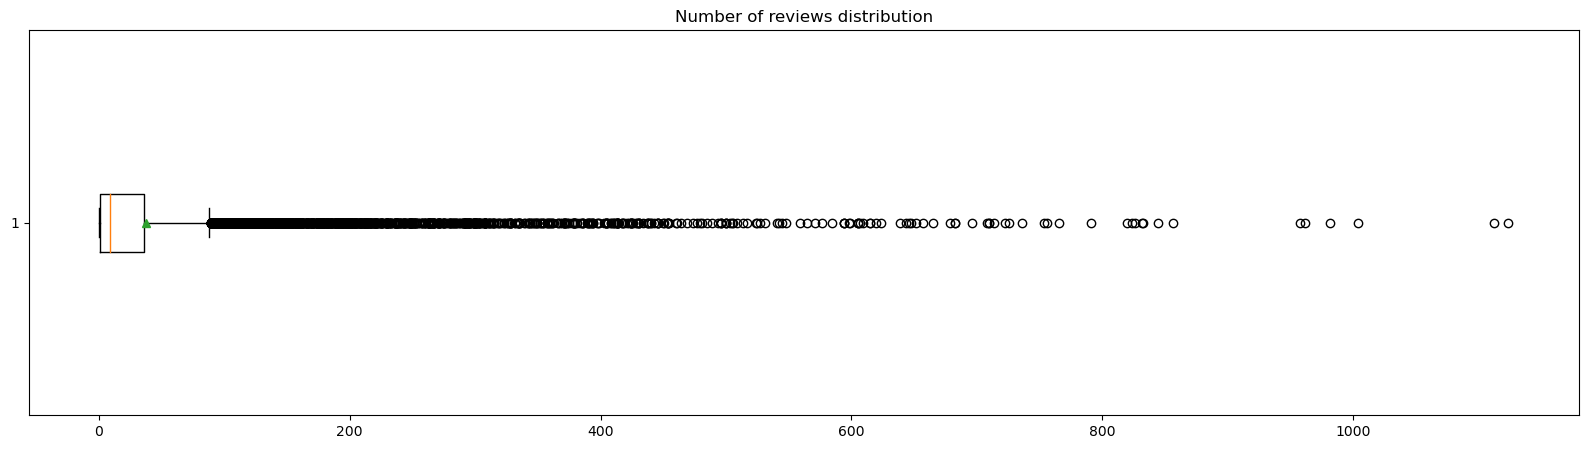

In [18]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(dataframe["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

### Availability 365

Número de dias en que el alojamiento se encuentra disponible en un periodo de un año.

In [19]:
# Calculating basic statistics for number of reviews
dataframe['availability_365'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    14694.000000
mean       153.145229
std        136.530839
min          0.000000
5%           0.000000
25%          0.000000
50%        124.000000
75%        302.000000
95%        362.000000
max        365.000000
Name: availability_365, dtype: float64

In [20]:
# Seen how many listings has not avaliability in 365 days
value_counts = dataframe["availability_365"].value_counts()
value_counts.get(0, 0)

3692

In [21]:
# Calculating the absolute frecuency of availability_365
dataframe["availability_365"].value_counts(dropna=False, normalize=False)

0      3692
365     339
364     286
90      183
89      183
       ... 
229       7
184       7
127       7
187       7
278       5
Name: availability_365, Length: 366, dtype: int64

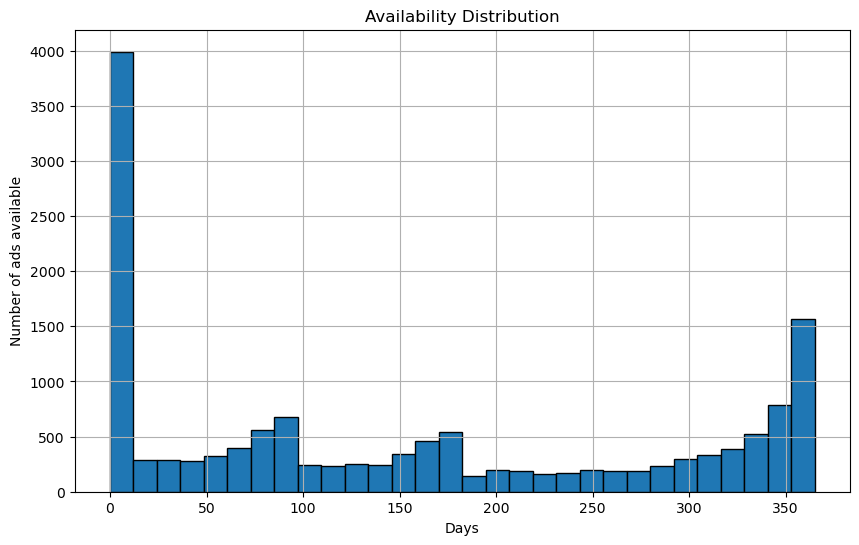

In [22]:
# Plotting a histogram of availability
availability = dataframe['availability_365']

plt.figure(figsize=(10, 6))
plt.hist(availability, bins=30, edgecolor='k')
plt.title("Availability Distribution")
plt.xlabel("Days")
plt.ylabel("Number of ads available")
plt.grid(True)
plt.show()

### Price

Precio por día en moneda local ($ Dolar).

El atributo precio es de tipo texto y contiene el caracter '$' y separa los decimales por coma, por lo cual se hace necesario modificar el tipo de esta columna para que sea float.

In [23]:
# We need to transform the price attribute from object to float
dataframe["price"] = dataframe["price"].str.replace("[$,]", "", regex=True).astype(float)

In [24]:
dataframe["price"]

0         248.0
1         107.0
2         110.0
3          99.0
4        1000.0
          ...  
14689     521.0
14690      68.0
14691     296.0
14692     223.0
14693      65.0
Name: price, Length: 14694, dtype: float64

In [25]:
# Calculating basic statistics for price
dataframe['price'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    14694.000000
mean       268.724581
std        569.682846
min          0.000000
5%          47.000000
25%         94.000000
50%        150.000000
75%        260.000000
95%        803.750000
max      20000.000000
Name: price, dtype: float64

In [26]:
# Seen how price has cero value
value_counts = dataframe['price'].value_counts()
value_counts.get(0, 0)

2

In [27]:
# Some calculations for determining an outlier threshold
q1 = dataframe["price"].quantile(0.25)
q3 = dataframe["price"].quantile(0.75)
iqr = q3 - q1

[]

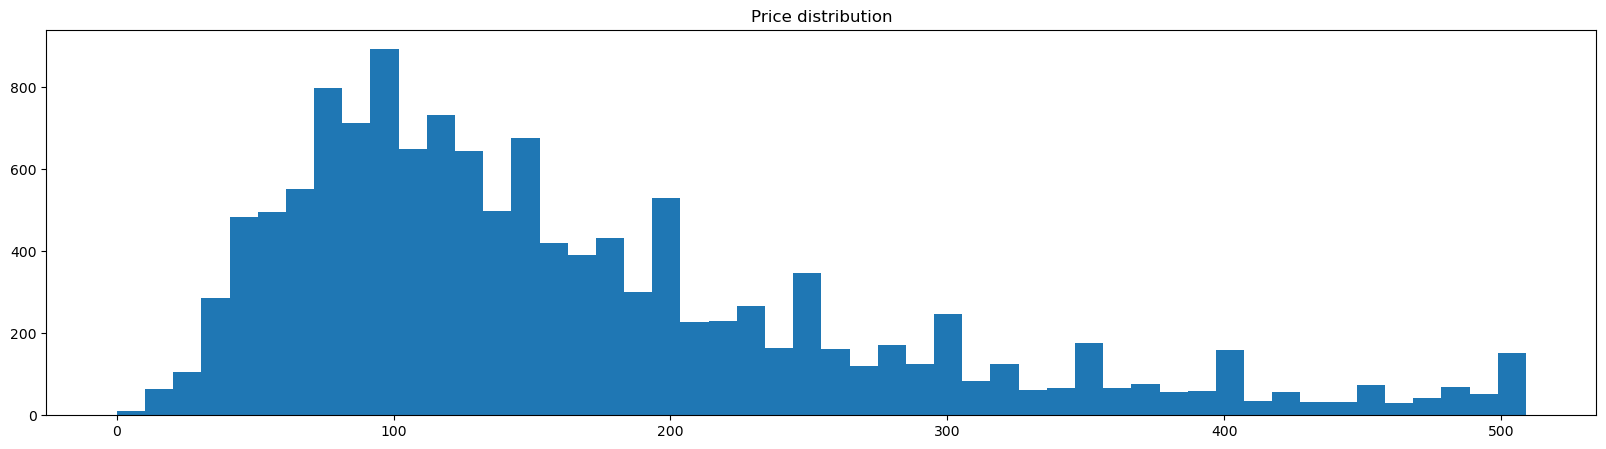

In [28]:
plt.figure(figsize=(20, 5))
plt.hist(dataframe.loc[dataframe["price"] <= (q3 + 1.5 * iqr)]["price"], bins=50)
plt.title("Price distribution")
plt.plot()

## 3. Estrategia de análisis

La estrategia de análisis se basará en un enfoque integral para identificar las mejores opciones de inversión inmobiliaria en el contexto de alojamientos de Airbnb. Comenzaré utilizando los resultados obtenidos de los cálculos de estadísticas descriptivas realizados en el punto **2. Entendimiento inicial de datos** en la sección de **análisis univariado** para obtener una comprensión general de los atributos clave como el precio por noche, la capacidad y la tasa de ocupación. Esto proporcionará una visión inicial de la distribución y variabilidad de los datos. El siguiente paso será realizar la limpieza y preparación de los datos para identificar y abordar problemas como valores faltantes, duplicados o atípicos en las variables relevantes que puedan afectar la calidad de los resultados. 

El siguiente paso será utilizar técnicas gráficas para visualizar relaciones entre varios atributos relevantes. Por ejemplo, crearé diagramas de dispersión para explorar cómo la tasa de ocupación varía en función del precio por noche y el tipo de propiedad. Además, trazaré mapas geográficos para resaltar las ubicaciones de alta demanda y correlacionarlas con la tasa de ocupación y precios para identificar propiedades con el mejor rendimiento financiero en relación con su ubicación y precio. Esto permitirá identificar segmentos de inversión y oportunidades de diversificación. Lo anterior proporcionará insights sobre los factores que influyen en la rentabilidad y podrían utilizarse para tomar decisiones informadas sobre estrategias de inversión.

## 4. Desarrollo de la estrategia

### 4.1. Análisis de resultados estadísticas descriptivas top 5 atributos más importantes para el análisis

**accommodates** 

Un dato interesante que se puede apreciar para el atributo **accommodates** mirando la gráfica **Accommodates Distribution** es que la capacidad de los alojamientos que muestra un número mayor son las de capacidad par. También podemos observar que existen dos campos con un valor de cero.
<br/><br/>

**Neighbourhood cleansed (Zip code)**

Como su puede observar con la **absolute frecuency** inicialmente se identifica que el mayor número de alojamientos se pueden encontrar cerca a la parte central de la ciudad por ejemplo lo observamos en los tres primeros datos: 
- **78704**: 2274
- **78702**: 1769
- **78701**: 965
<br/><br/>

**Number of reviews**

Este atributo muestra que 2967 alojamientos no tienen review, esto es un indicador de que no todas las personas que utilizan el servicio escriben una review, lo cual es un comportamiento esperado. Este atributo puede llegar a servirnos si por ejemplo hay un caso donde debamos seleccionar entre un par de propiedades con valores muy similares, lo podemos utilizar como mecanismo de desempate.
<br/><br/>

**availability 365**

El atributo availability_365 nos puede ayudar a entender en un periodo de tiempo determinado, para este caso 365 días, cual es la tasa de ocupación de un alojamiento, el cual es un dato muy útil a la hora de tomar una decisión de inversión.
<br/><br/>

**Price**

El histograma muestra la distribución de los precios sin los valores atípicos potenciales que están por encima del umbral calculado. Esto nos puede ayudar a obtener una mejor comprensión de cómo se distribuyen los precios en el dataset después de eliminar valores que podrían considerarse atípicos. como pudimos apreciar un valor atípico sería el precio que se obtuvo al realizar las estadísticas básicas al campo donde el **máx** es de **20.000**, también obtuvimos el valor cero, si recordamos en al analizar el campo **accommodates** también tuvimos 2 campos con cero, a continuación vamos a validar si pertenecen al mismo predio.

In [29]:
# Seen the rows price and accommodates where price has cero value
new_data = dataframe[dataframe['price'] == 0]
new_data[['accommodates', 'neighbourhood_cleansed', 'number_of_reviews', 'availability_365', 'price']]

,accommodates,neighbourhood_cleansed,number_of_reviews,availability_365,price
5754,0,78746,0,0,0.0
6325,0,78704,0,0,0.0


Efectivamente los registros donde el valor correspondiente al **price** cero son los mismos registros donde **accommodates** es cero.

### 4.2. Limpieza y preparación de datos

Vamos a iniciar por crear una copia del dataset para trabajar.

In [30]:
# Create a dataframe copy
df_austin = dataframe.copy()
df_austin.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,354569,https://www.airbnb.com/rooms/354569,20230610213056,2023-06-11,previous scrape,Home in Austin · ★5.0 · 2 bedrooms · 2 beds · ...,"Spacious, open and bright, & in the heart of e...",Private and secluded but less than 3 minutes f...,https://a0.muscache.com/pictures/127a1ad3-9520...,2049988,https://www.airbnb.com/users/show/2049988,Mike,2012-04-01,"Austin, TX",I enjoy living on the fringe of everything fun...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/2049988/profi...,https://a0.muscache.com/im/users/2049988/profi...,Old Enfield,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78703,NaN,30.28885,-97.76001,Entire home,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""Essentials"", ""Shampoo"", ""Hair dryer"", ""TV"", ...",248.0,3,100,3.0,3.0,100.0,100.0,3.0,100.0,NaN,t,0,0,0,0,2023-06-11,11,0,0,2012-03-15,2017-07-05,5.00,5.00,5.00,5.0,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
1,5456,https://www.airbnb.com/rooms/5456,20230610213056,2023-06-11,city scrape,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, TX",I am a licensed Real Estate Broker and owner o...,within a few hours,100%,95%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,4.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78702,NaN,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""HDTV with Amazon Prime Video, HBO Max, Hulu,...",107.0,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,23,53,83,341,2023-06-11,648,45,5,2009-03-08,2023-06-04,4.84,4.87,4.85,4.9,4.82,4.72,4.79,NaN,f,1,1,0,0,3.73
2,355176,https://www.airbnb.com/rooms/355176,20230610213056,2023-06-11,previous scrape,Rental unit in Austin · ★4.85 · 1 bedroom · 1 ...,Private Guest house 4 miles from the Downtown ...,Our neighborhood is very safe with lots of wal...,https://a0.muscache.com/pictures/3950693/82e0f...,1798140,https://www.airbnb.com/users/show/1798140,Scott,2012-02-23,"Austin, TX","I enjoy hanging out with friends, running, lea...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1798140/profi...,https://a0.muscache.com/im/users/1798140/profi...,South Manchaca,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78745,NaN,30.22187,-97.77470,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Smoking allowed"", ""Essentials"", ""Microwave"",...",110.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,0,0,2023-06-11,21,0,0,2012-03-15,2021-05-02,4.85,4.90,4.55,4.8,4

### Retirar columnas que no tiene datos

Procedemos a retirar las columnas que no contienen ningun dato.

In [31]:
# columns for delete
not_data_columns = ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license']

In [32]:
# drop columns
df_austin = df_austin.drop(columns=not_data_columns)

In [33]:
df_austin.shape

(14694, 71)

### Retirar columnas de datos que no aportan al análisis

Procedemos a retirar las columnas que contiene ids, urls, columnas que solo tienen un valor, columnas de fechas, columnas de descripciones generales, tiempos de respuesta y de información del host.

In [34]:
df_austin["scrape_id"].unique()

array([20230610213056], dtype=int64)

In [35]:
df_austin["last_scraped"].unique()

array(['2023-06-11'], dtype=object)

In [36]:
# columns for delete
columns_not_relevant = ['id', 
                        'listing_url', 
                        'scrape_id', 
                        'last_scraped', 
                        'source', 
                        'name',
                        'description',
                        'neighborhood_overview',
                        'picture_url', 
                        'host_id', 
                        'host_url', 
                        'host_name', 
                        'host_location', 
                        'host_about', 
                        'host_response_time', 
                        'host_response_rate', 
                        'host_acceptance_rate',
                        'host_is_superhost',
                        'host_thumbnail_url', 
                        'host_picture_url', 
                        'host_neighbourhood', 
                        'host_listings_count', 
                        'host_total_listings_count', 
                        'host_verifications',
                        'host_has_profile_pic', 
                        'host_identity_verified',
                        'neighbourhood',
                        'minimum_minimum_nights', 
                        'maximum_minimum_nights', 
                        'minimum_maximum_nights', 
                        'maximum_maximum_nights', 
                        'minimum_nights_avg_ntm', 
                        'maximum_nights_avg_ntm', 
                        'has_availability', 
                        'calendar_last_scraped',
                        'number_of_reviews_ltm', 
                        'number_of_reviews_l30d', 
                        'first_review', 
                        'last_review',
                        'review_scores_accuracy', 
                        'review_scores_cleanliness', 
                        'review_scores_checkin', 
                        'review_scores_communication',
                        'review_scores_location',
                        'review_scores_value',
                        'reviews_per_month',
                        'instant_bookable', 
                        'calculated_host_listings_count',
                        'calculated_host_listings_count_entire_homes', 
                        'calculated_host_listings_count_private_rooms',
                        'calculated_host_listings_count_shared_rooms']

In [37]:
# drop columns
df_austin = df_austin.drop(columns=columns_not_relevant)

In [38]:
df_austin.shape

(14694, 20)

In [39]:
# show the dataset info
df_austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_since              14692 non-null  object 
 1   neighbourhood_cleansed  14694 non-null  int64  
 2   latitude                14694 non-null  float64
 3   longitude               14694 non-null  float64
 4   property_type           14694 non-null  object 
 5   room_type               14694 non-null  object 
 6   accommodates            14694 non-null  int64  
 7   bathrooms_text          14680 non-null  object 
 8   bedrooms                11897 non-null  float64
 9   beds                    14564 non-null  float64
 10  amenities               14694 non-null  object 
 11  price                   14694 non-null  float64
 12  minimum_nights          14694 non-null  int64  
 13  maximum_nights          14694 non-null  int64  
 14  availability_30         14694 non-null

In [40]:
# show the dataset date
df_austin.head()

,host_since,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating
0,2012-04-01,78703,30.28885,-97.76001,Entire home,Entire home/apt,6,2 baths,2.0,2.0,"[""Essentials"", ""Shampoo"", ""Hair dryer"", ""TV"", ...",248.0,3,100,0,0,0,0,11,5.00
1,2009-02-16,78702,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,1 bath,1.0,2.0,"[""HDTV with Amazon Prime Video, HBO Max, Hulu,...",107.0,2,90,23,53,83,341,648,4.84
2,2012-02-23,78745,30.22187,-97.77470,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Smoking allowed"", ""Essentials"", ""Microwave"",...",110.0,30,1125,0,0,0,0,21,4.85
3,2012-01-27,78705,30.29905,-97.73881,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Kitchen"", ""Pets allowed"", ""Air conditioning""...",99.0,30,180,28,58,88,363,1,5.00
4,2012-02-23,78704,30.24748,-97.74724,Entire home,Entire home/apt,7,NaN,3.0,7.0,"[""Kitchen"", ""Free parking on premises"", ""Air c...",1000.0,1,7,30,60,90,365,3,5.00


### Borrar registros

Vamos a borrar los 2 registros donde **price** y **accommodates** son iguales a cero.

In [41]:
new_data = df_austin[df_austin['price'] == 0]
new_data[['accommodates', 'neighbourhood_cleansed', 'number_of_reviews', 'availability_365', 'price']]

,accommodates,neighbourhood_cleansed,number_of_reviews,availability_365,price
5754,0,78746,0,0,0.0
6325,0,78704,0,0,0.0


In [42]:
# Crea un nuevo DataFrame sin las filas donde 'price' y 'accommodates' son iguales a cero
df_austin = df_austin.loc[(df_austin['price'] != 0) & (df_austin['accommodates'] != 0)]

In [43]:
new_data = df_austin[df_austin['price'] == 0]
new_data[['accommodates', 'neighbourhood_cleansed', 'number_of_reviews', 'availability_365', 'price']]

,accommodates,neighbourhood_cleansed,number_of_reviews,availability_365,price


### Crear una nueva columna numerica para bathrooms

El atributo **bathrooms_text** es un string que contiene la cantidad numerica de bathrooms y una palabra concatenada, se creara una nueva atributo **number_of_bathrooms** que sera numerica, adicionalmente los datos faltantes los llenaremos con la moda y finalmente se borrara **bathrooms_text**. 

In [44]:
# See how many null values are in bathrooms_text
len(df_austin[df_austin['bathrooms_text'].isnull()])

12

In [45]:
# Calculate the mode
moda = df_austin['bathrooms_text'].mode()[0]
print(moda)

1 bath


In [46]:
# Replace the null values
df_austin['bathrooms_text'].fillna(moda, inplace=True)

In [47]:
# Create the new attribute number_of_bathrooms
df_austin['number_of_bathrooms'] = df_austin['bathrooms_text'].str.extract('(\d+)').astype(float)

In [48]:
# Drop bathrooms_text
df_austin.drop(columns=['bathrooms_text'], inplace=True)

In [49]:
df_austin.head()

,host_since,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,number_of_bathrooms
0,2012-04-01,78703,30.28885,-97.76001,Entire home,Entire home/apt,6,2.0,2.0,"[""Essentials"", ""Shampoo"", ""Hair dryer"", ""TV"", ...",248.0,3,100,0,0,0,0,11,5.00,2.0
1,2009-02-16,78702,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,1.0,2.0,"[""HDTV with Amazon Prime Video, HBO Max, Hulu,...",107.0,2,90,23,53,83,341,648,4.84,1.0
2,2012-02-23,78745,30.22187,-97.77470,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Smoking allowed"", ""Essentials"", ""Microwave"",...",110.0,30,1125,0,0,0,0,21,4.85,1.0
3,2012-01-27,78705,30.29905,-97.73881,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Kitchen"", ""Pets allowed"", ""Air conditioning""...",99.0,30,180,28,58,88,363,1,5.00,1.0
4,2012-02-23,78704,30.24748,-97.74724,Entire home,Entire home/apt,7,3.0,7.0,"[""Kitchen"", ""Free parking on premises"", ""Air c...",1000.0,1,7,30,60,90,365,3,5.00,1.0


In [50]:
df_austin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 14693
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_since              14690 non-null  object 
 1   neighbourhood_cleansed  14692 non-null  int64  
 2   latitude                14692 non-null  float64
 3   longitude               14692 non-null  float64
 4   property_type           14692 non-null  object 
 5   room_type               14692 non-null  object 
 6   accommodates            14692 non-null  int64  
 7   bedrooms                11897 non-null  float64
 8   beds                    14564 non-null  float64
 9   amenities               14692 non-null  object 
 10  price                   14692 non-null  float64
 11  minimum_nights          14692 non-null  int64  
 12  maximum_nights          14692 non-null  int64  
 13  availability_30         14692 non-null  int64  
 14  availability_60         14692 non-null

### Tratar con los valores faltantes

Los atributos **host_since, bedrooms, beds, review_scores_rating y number_of_bathrooms** tiene valores faltantes los cuales manejaremos de la siguiente forma: 

- Para **host_since** que es un campo que guarda una fecha y que solo le faltan 2 datos los llenaremos con la moda 
- Para **bedrooms, beds, y number_of_bathrooms** cuyos valores son numéricos utilizaremos la mediana
- Para **review_scores_rating** que es un valor numérico y cuya cantidad de registros faltantes es muy elevada (cerca del 20 % ), utilizaremos un valor atípico, esto con el fin de que si llegamos a necesitar utilizar este dato podamos filtrar los datos excluyendo este valor atípico. 

### host since

In [51]:
# Calculate the mode for host_since
moda_host_since = df_austin['host_since'].mode()[0]
print(moda_host_since)

2019-05-22


In [52]:
# Replace the null values
df_austin['host_since'].fillna(moda, inplace=True)

### bedrooms, beds, y number_of_bathrooms

In [53]:
# Calculate the median of each column
median_bedrooms = df_austin['bedrooms'].median()
print(median_bedrooms)

median_beds = df_austin['beds'].median()
print(median_beds)

median_number_of_bathrooms = df_austin['number_of_bathrooms'].median()
print(median_number_of_bathrooms)

# Replace the null values with the respective medians.
df_austin['bedrooms'].fillna(median_bedrooms, inplace=True)
df_austin['beds'].fillna(median_beds, inplace=True)
df_austin['number_of_bathrooms'].fillna(median_number_of_bathrooms, inplace=True)

2.0
2.0
1.0


### review_scores_rating

In [54]:
# Calculating the max values
max_rating = df_austin['review_scores_rating'].max()
max_rating

5.0

como valor atípico utilizaremos el valor 100

In [55]:
# Replace null values in the column 'review_scores_rating' with the number 100
df_austin['review_scores_rating'].fillna(100, inplace=True)

In [56]:
df_austin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 0 to 14693
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_since              14692 non-null  object 
 1   neighbourhood_cleansed  14692 non-null  int64  
 2   latitude                14692 non-null  float64
 3   longitude               14692 non-null  float64
 4   property_type           14692 non-null  object 
 5   room_type               14692 non-null  object 
 6   accommodates            14692 non-null  int64  
 7   bedrooms                14692 non-null  float64
 8   beds                    14692 non-null  float64
 9   amenities               14692 non-null  object 
 10  price                   14692 non-null  float64
 11  minimum_nights          14692 non-null  int64  
 12  maximum_nights          14692 non-null  int64  
 13  availability_30         14692 non-null  int64  
 14  availability_60         14692 non-null

In [57]:
df_austin.head()

,host_since,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,number_of_bathrooms
0,2012-04-01,78703,30.28885,-97.76001,Entire home,Entire home/apt,6,2.0,2.0,"[""Essentials"", ""Shampoo"", ""Hair dryer"", ""TV"", ...",248.0,3,100,0,0,0,0,11,5.00,2.0
1,2009-02-16,78702,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,1.0,2.0,"[""HDTV with Amazon Prime Video, HBO Max, Hulu,...",107.0,2,90,23,53,83,341,648,4.84,1.0
2,2012-02-23,78745,30.22187,-97.77470,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Smoking allowed"", ""Essentials"", ""Microwave"",...",110.0,30,1125,0,0,0,0,21,4.85,1.0
3,2012-01-27,78705,30.29905,-97.73881,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Kitchen"", ""Pets allowed"", ""Air conditioning""...",99.0,30,180,28,58,88,363,1,5.00,1.0
4,2012-02-23,78704,30.24748,-97.74724,Entire home,Entire home/apt,7,3.0,7.0,"[""Kitchen"", ""Free parking on premises"", ""Air c...",1000.0,1,7,30,60,90,365,3,5.00,1.0


### 4.3. Análisis Bivariado

Primero obtendremos nuevamente las estadisticas basicas para los atributos principales

In [58]:
# Calculating basic statistics for accommodates
df_austin['accommodates'].describe()

count    14692.000000
mean         4.810918
std          3.187990
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         16.000000
Name: accommodates, dtype: float64

In [59]:
# Calculating basic statistics for availability_365
df_austin['availability_365'].describe()

count    14692.000000
mean       153.166077
std        136.528438
min          0.000000
25%          0.000000
50%        124.000000
75%        302.000000
max        365.000000
Name: availability_365, dtype: float64

In [60]:
# Calculating basic statistics for price
df_austin['price'].describe()

count    14692.000000
mean       268.761163
std        569.712993
min          1.000000
25%         94.000000
50%        150.000000
75%        260.000000
max      20000.000000
Name: price, dtype: float64

Como observamos los valores para **price** presentan valores atípicos por lo cual para cálculos posteriores crearemos la variable **max_price** la cual tiene un límite superior el valore de q3 más 1.5 veces el rango intercuartílico ya la variable **min_price** cuyo valor es el promedio de **price**.

In [61]:
# Some calculations for determining an outlier threshold
q1_austin = df_austin["price"].quantile(0.25)
q3_austin = df_austin["price"].quantile(0.75)
iqr_austin = q3_austin - q1_austin
print(iqr_austin)

166.0


In [62]:
max_price = q3_austin + 1.5 * iqr_austin
print(max_price)

509.0


In [63]:
min_price =  df_austin["price"].mean()
print(min_price)

268.7611625374353


## Gráficos de dispersión y correlación

In [64]:
# top 5 attributes
selected_columns = ['accommodates', 'neighbourhood_cleansed', 'number_of_reviews', 'availability_365', 'price']
df_selected = df_austin[selected_columns]

Primero se graficará el Scatter plot entre **accommodates** y **price**

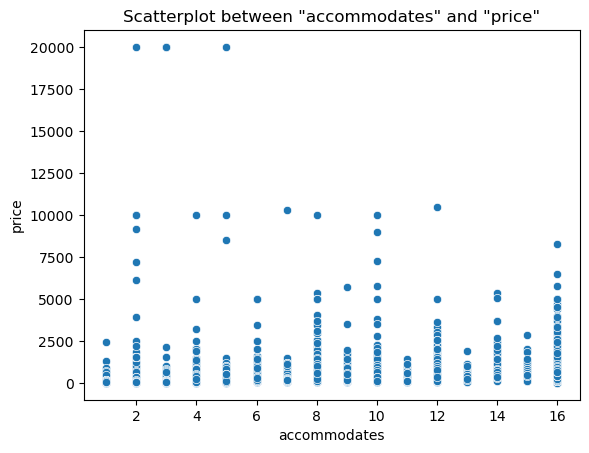

In [65]:
# Scatter plot between 'availability_365' and 'price'
sns.scatterplot(x='accommodates', y='price', data=df_selected)
plt.title('Scatterplot between "accommodates" and "price"')
plt.show()

Ahora se graficará el Scatter plot entre **accommodates** y **price** pero acotando el valor del **price** utilizando **min_price y max_price**

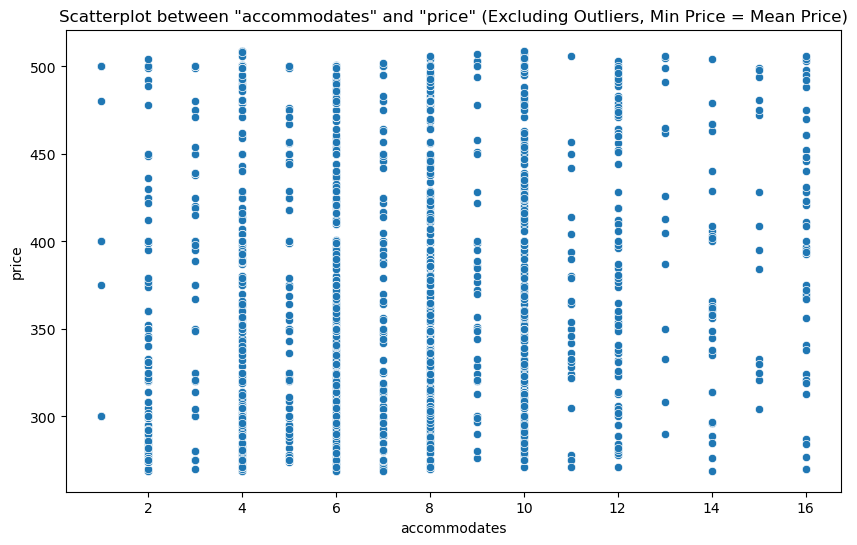

In [66]:
# Filter the DataFrame to exclude outliers and set a minimum price
df_filtered = df_austin[(df_austin['price'] >= min_price) & (df_austin['price'] <= max_price)]

# Create a scatterplot between 'accommodates' and 'price' without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='accommodates', y='price')
plt.title('Scatterplot between "accommodates" and "price" (Excluding Outliers, Min Price = Mean Price)')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.show()

### Matriz de correlación utilizando price sin outliders

In [67]:
# Filter the DataFrame to exclude outliers and set a minimum price
df_filtered = df_austin[(df_austin['price'] >= min_price) & (df_austin['price'] <= max_price)]

# Calculate the correlation matrix for 'price' within [min_price, max_price]
corr_matrix = df_filtered.corr()
price_corr = corr_matrix["price"].sort_values(ascending=False)

# Display the correlation values
print(price_corr)

price                     1.000000
accommodates              0.136912
beds                      0.131775
number_of_bathrooms       0.126579
bedrooms                  0.111259
review_scores_rating      0.077243
availability_365          0.037001
latitude                  0.016419
maximum_nights           -0.004347
number_of_reviews        -0.006978
minimum_nights           -0.033707
availability_90          -0.039745
availability_60          -0.041494
neighbourhood_cleansed   -0.046532
availability_30          -0.056735
longitude                -0.074304
Name: price, dtype: float64


Scatter plot entre **availability_365 y price**

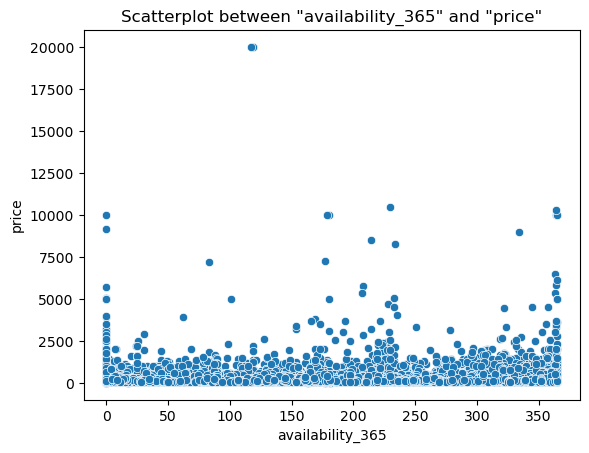

In [68]:
# Gráfico de dispersión entre 'availability_365' y 'price'
sns.scatterplot(x='availability_365', y='price', data=df_selected)
plt.title('Scatterplot between "availability_365" and "price"')
plt.show()

Ahora se graficará el Scatter plot entre **availability_365 y price** pero acotando el valor del price utilizando **min_price y max_price**

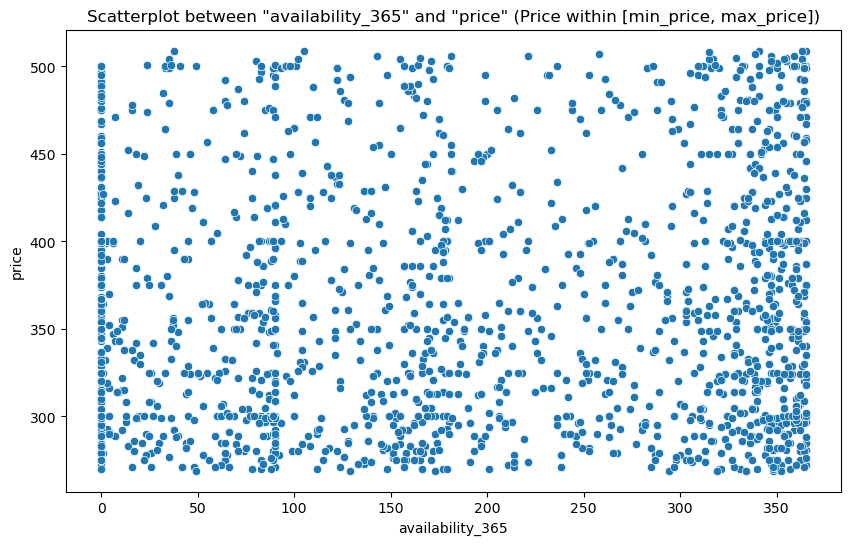

In [69]:
# Filter the DataFrame to exclude outliers and set a minimum price
df_filtered = df_austin[(df_austin['price'] >= min_price) & (df_austin['price'] <= max_price)]

# Create a scatterplot between 'availability_365' and 'price' with price within [min_price, max_price]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=df_filtered)
plt.title('Scatterplot between "availability_365" and "price" (Price within [min_price, max_price])')
plt.xlabel('availability_365')
plt.ylabel('price')
plt.show()

### Matriz de correlación utilizando availability_365

In [70]:
corr_matrix_2 = df_austin.corr()

In [71]:
corr_matrix_2["availability_365"].sort_values(ascending=False)

availability_365          1.000000
availability_90           0.705953
availability_60           0.650757
availability_30           0.580610
accommodates              0.179691
beds                      0.161080
number_of_bathrooms       0.129285
bedrooms                  0.108177
number_of_reviews         0.058596
maximum_nights            0.058086
price                     0.053227
latitude                  0.039628
minimum_nights            0.038177
neighbourhood_cleansed    0.024048
review_scores_rating     -0.024379
longitude                -0.060768
Name: availability_365, dtype: float64

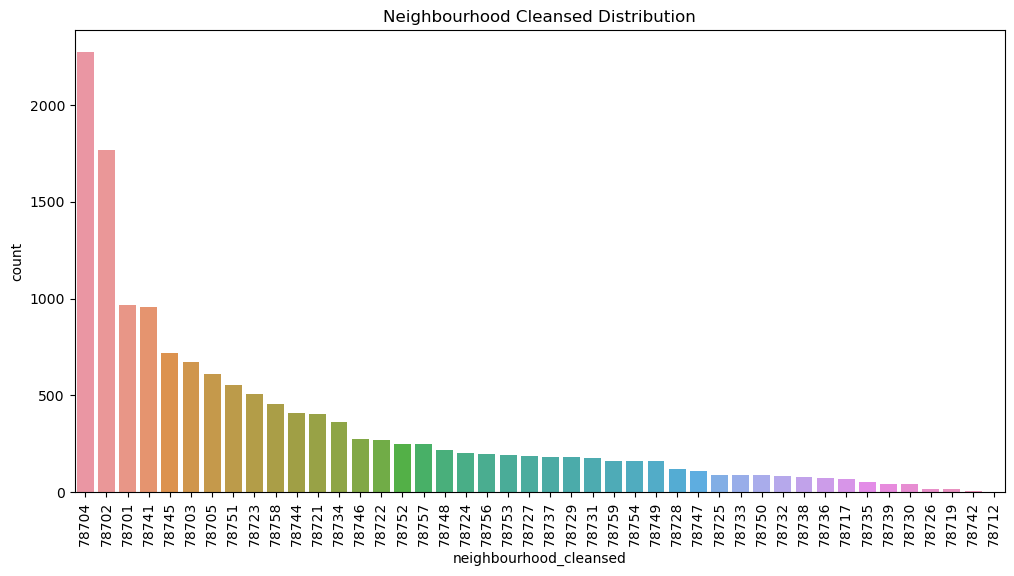

In [72]:
# countplot for 'neighbourhood_cleansed'
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_cleansed', data=df_selected, order=df_selected['neighbourhood_cleansed'].value_counts().index)
plt.title('Neighbourhood Cleansed Distribution')
plt.xticks(rotation=90)
plt.show()

## Mapas geográficos para resaltar las ubicaciones de alta demanda y sus correlaciones

### Mapa de Austin dividido por códigos zip

<img src="./imagenes/austin_zip_code_map.jpg" width="50%" height="50%"><br>

Dado que el conjunto de datos incluye información geográfica (latitud y longitud), vamos a crear un gráfico de dispersión de todos las zonas para visualizar los datos que nos permitan identificar las ubicaciones de los alojamientos en Austin. 

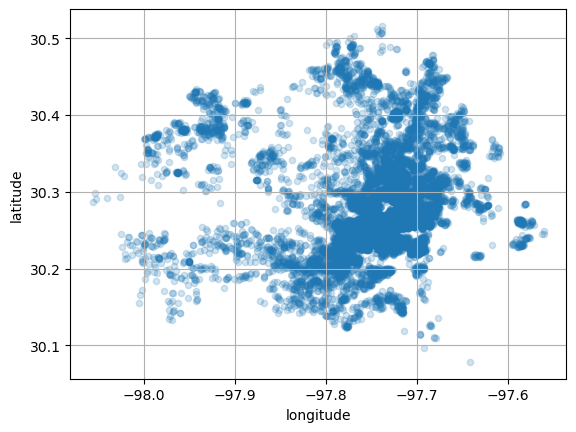

In [73]:
df_austin.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

## Mapa relación entre el atributo "accommodates" y "price"

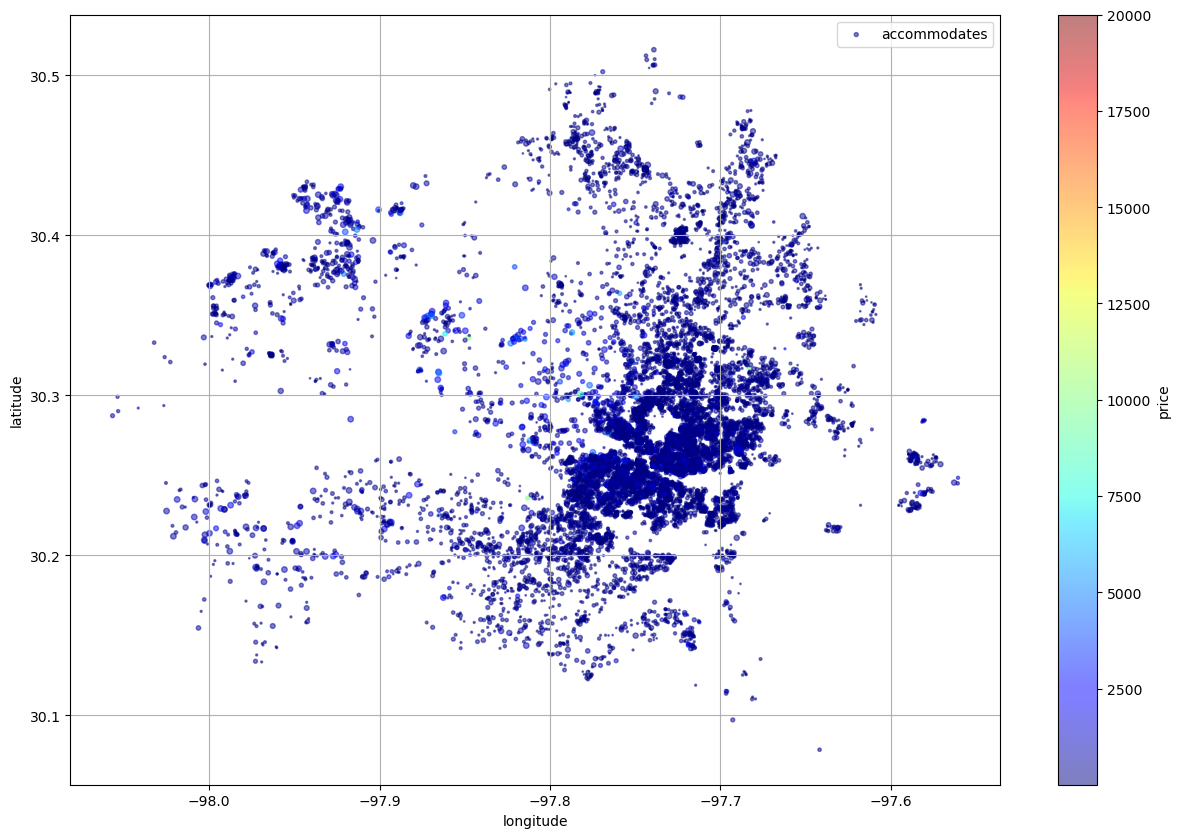

In [74]:
df_austin.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.5,
               s=df_austin["accommodates"], label="accommodates", 
               c="price", cmap="jet", colorbar=True, 
               legend=True, sharex=False, figsize=(15, 10))
plt.show()

## Mapa relación entre el atributo "accommodates" y "price" en el intervalo "min_price y max_price"

<Figure size 1000x700 with 0 Axes>

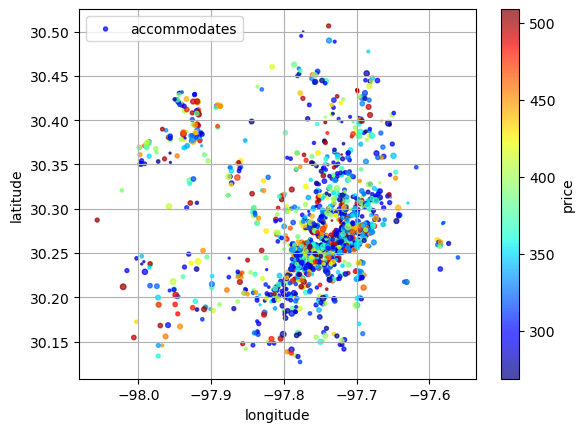

In [75]:
# Filter the DataFrame to exclude outliers and set a minimum price
df_filtered = df_austin[(df_austin['price'] >= min_price) & (df_austin['price'] <= max_price)]

# Create a scatterplot between 'longitude' and 'latitude' with price within [min_price, max_price]
plt.figure(figsize=(10, 7))
df_filtered.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.7,
                 s=df_filtered["accommodates"], label="accommodates", 
                 c="price", cmap="jet", colorbar=True, 
                 legend=True, sharex=False)
plt.show()

## Mapa relación entre el atributo "availability_365" y "price"

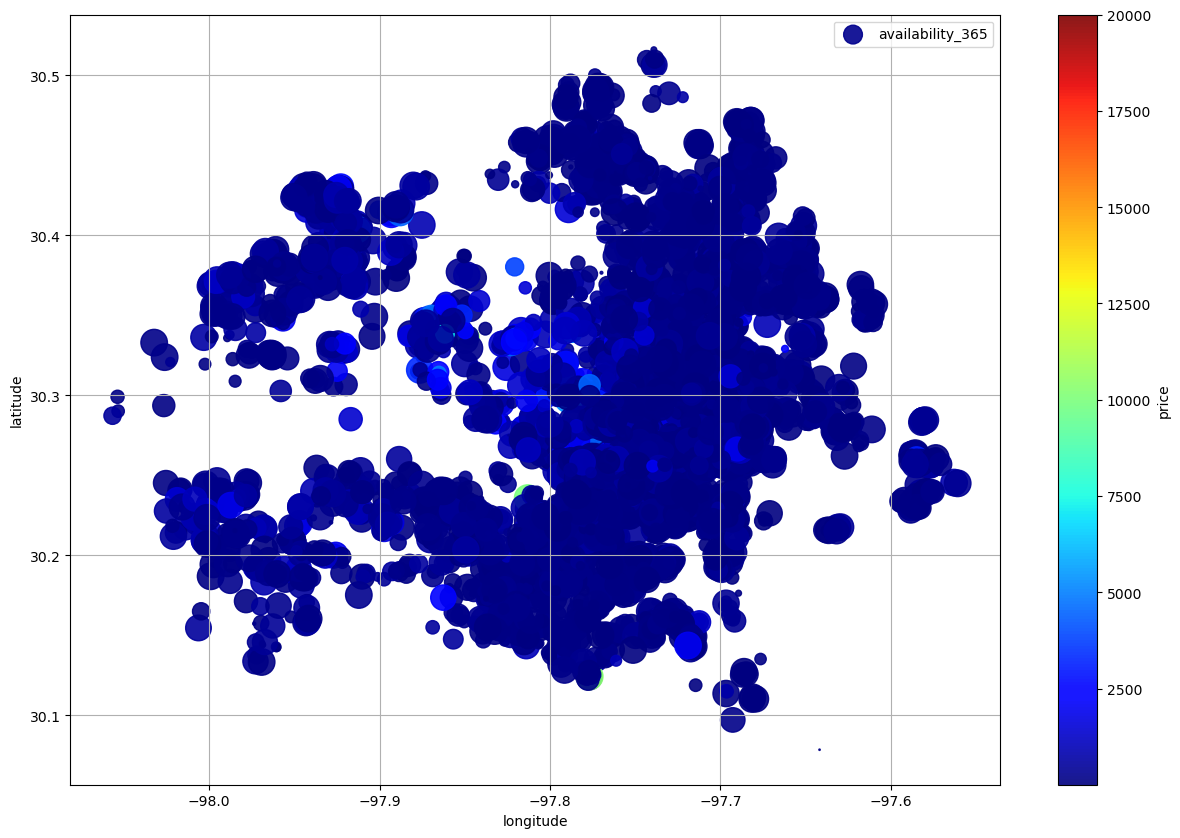

In [76]:
df_austin.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.9,
               s=df_austin["availability_365"], label="availability_365", 
               c="price", cmap="jet", colorbar=True, 
               legend=True, sharex=False, figsize=(15, 10))
plt.show()

## Mapa relación entre el atributo "availability_365" y "price" en el intervalo "min_price y max_price"

<Figure size 1000x700 with 0 Axes>

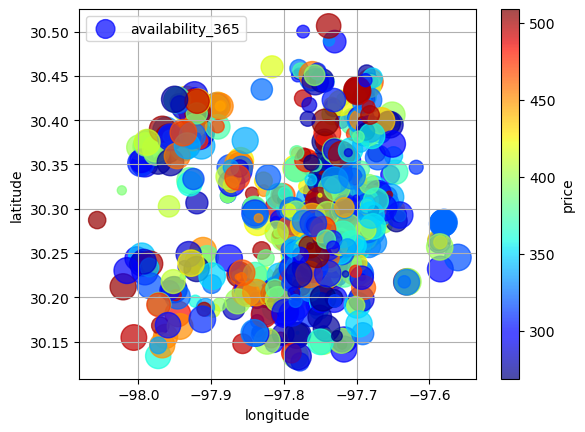

In [77]:
# Filter the DataFrame to exclude outliers and set a minimum price
df_filtered = df_austin[(df_austin['price'] >= min_price) & (df_austin['price'] <= max_price)]

# Create a scatterplot between 'longitude' and 'latitude' with price within [min_price, max_price]
plt.figure(figsize=(10, 7))
df_filtered.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.7,
                 s=df_filtered["availability_365"], label="availability_365", 
                 c="price", cmap="jet", colorbar=True, 
                 legend=True, sharex=False)
plt.show()

## Mapa relación entre el atributo "accommodates" y "availability_365"

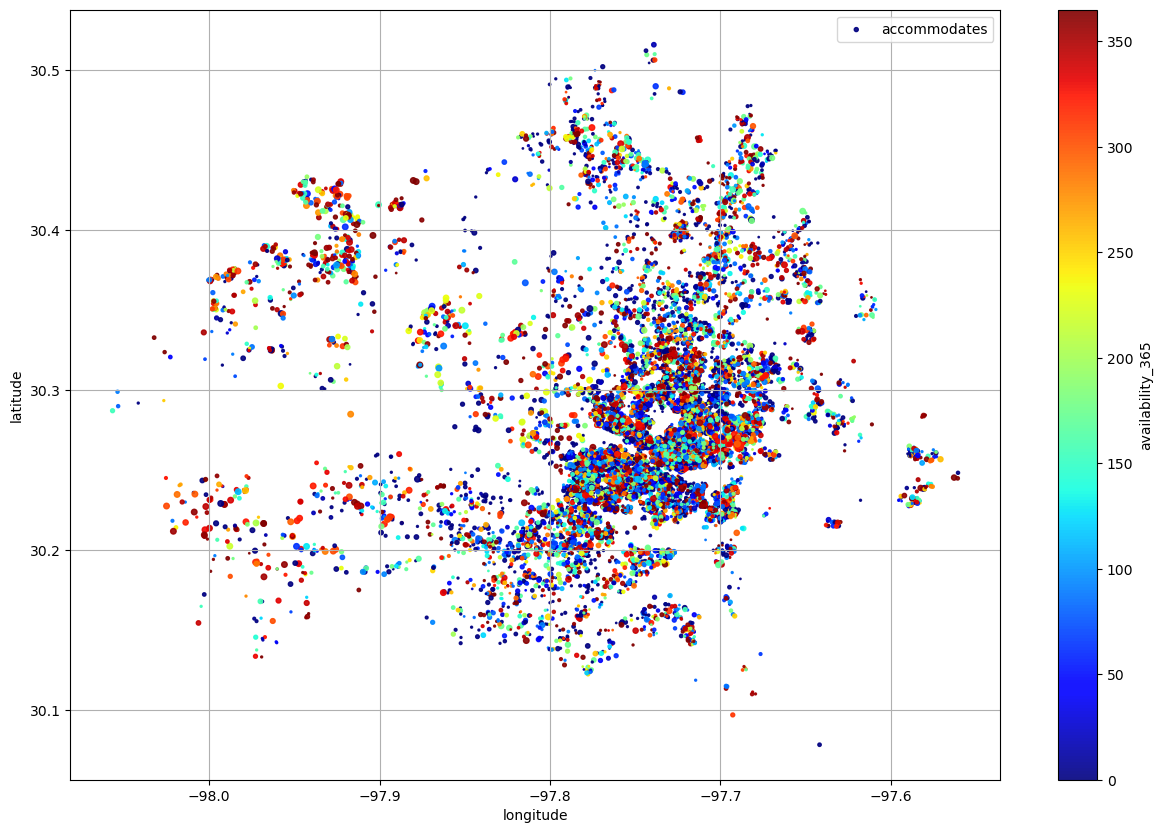

In [78]:
df_austin.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.9,
               s=df_austin["accommodates"], label="accommodates", 
               c="availability_365", cmap="jet", colorbar=True, 
               legend=True, sharex=False, figsize=(15, 10))
plt.show()

## Análisis de Pareto 

In [79]:
# neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = df_austin["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

In [80]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

[78704,
 78702,
 78701,
 78741,
 78745,
 78703,
 78705,
 78751,
 78723,
 78758,
 78744,
 78721,
 78734,
 78746,
 78722,
 78752,
 78757]

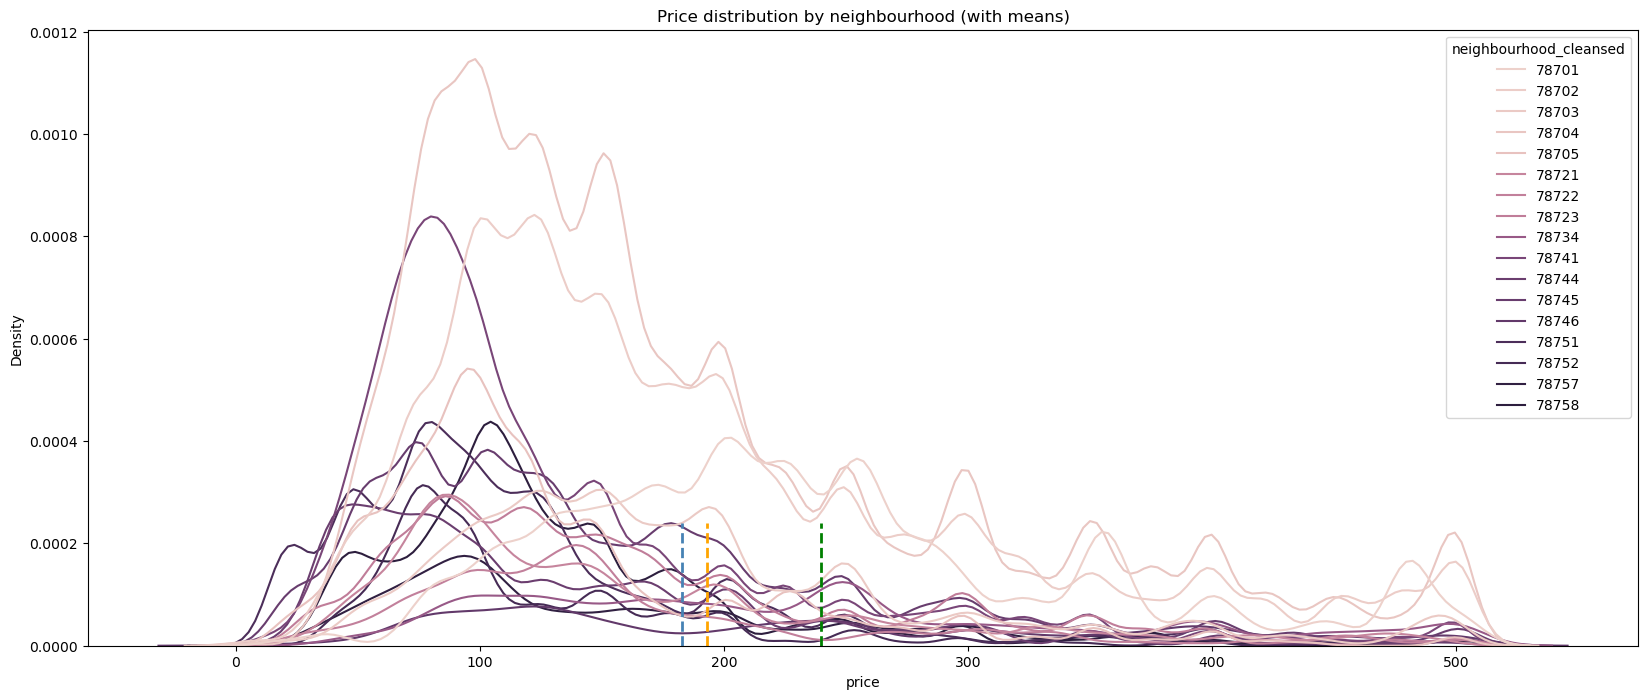

In [81]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=df_austin.loc[df_austin["price"] <= (q3 + 1.5 * iqr)].loc[df_austin["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(df_austin.loc[df_austin["price"] <= (q3 + 1.5 * iqr)].loc[df_austin["neighbourhood_cleansed"] == neighbourhood, "price"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

## 5. Generación de resultados

Finalmente para obtener un listado de propiedades que sean apropiadas para inversión, vamos a generar una funcion que realice un filtrado de registros teniendo en cuenta las reglas obtenidas en el analisis bivariado como lo son:
- 'accommodates' su valor sea par.
- 'availability_365' su valor sea menor a su media.
- 'price' su valor este el el rango que sea mayor a su media y menor a 1.5 rangos intercuantiles.
- 'number_of_reviews' su valor sea mayor a su media. 
- 'review_scores_rating su valor este en el rango entre 4 y 5.

Gracias al analisis realizado pudimos encontrar estas reglas como los indicativos guia para encontrar los mejores propiedades para realizar inversion en el negocio de Airbnb.

### Función para identificar las mejores propiedades para inversión (airbnb)

In [82]:
def filter_dataframe(df):
    # Some calculations for determining an outlier threshold for 'price'
    q1_price = df['price'].quantile(0.25)
    q3_price = df['price'].quantile(0.75)
    iqr_price = q3_price - q1_price

    # Calculate max_price for identifying outliers (1.5 * IQR above Q3)
    max_price = q3_price + 1.5 * iqr_price

    # Calculate min_price as the mean of prices
    min_price = df['price'].mean()

    # Calculate mean of 'availability_365'
    mean_availability_365 = df['availability_365'].mean()

    # Calculate mean of 'number_of_reviews'
    mean_number_of_reviews = df['number_of_reviews'].mean()

    # Filter the DataFrame based on conditions
    filtered_df = df[(df['accommodates'] % 2 == 0) & 
                     (df['availability_365'] < mean_availability_365) & 
                     (df['price'] >= min_price) & (df['price'] <= max_price) & 
                     (df['number_of_reviews'] > mean_number_of_reviews) & 
                     ((df['review_scores_rating'] >= 4) & (df['review_scores_rating'] <= 5))]

    return filtered_df


In [83]:
# Calls the function for filtering the DataFrame
austin_result = filter_dataframe(df_austin).sort_values(by=['price', 'review_scores_rating'], ascending=[False, False])
austin_result

,host_since,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,number_of_bathrooms
5584,2017-02-01,78702,30.27582,-97.72043,Entire home,Entire home/apt,8,3.0,3.0,"[""Essentials"", ""Shampoo"", ""Microwave"", ""Dishes...",506.0,2,1125,10,28,44,143,107,4.96,2.0
3289,2017-11-01,78731,30.32803,-97.75425,Entire home,Entire home/apt,6,3.0,3.0,"[""Coffee maker: Keurig coffee machine"", ""Essen...",500.0,4,30,0,0,0,0,38,4.97,2.0
1662,2011-08-16,78746,30.32176,-97.78914,Entire home,Entire home/apt,12,6.0,7.0,"[""Essentials"", ""Shampoo"", ""Table corner guards...",500.0,3,1125,0,0,0,0,44,4.91,4.0
4310,2012-10-03,78734,30.39397,-97.91730,Entire home,Entire home/apt,8,3.0,4.0,"[""Essentials"", ""Shampoo"", ""Microwave"", ""Dishes...",500.0,2,1125,0,0,0,0,85,4.87,2.0
2310,2016-06-04,78749,30.21731,-97.86050,Entire home,Entire home/apt,12,4.0,7.0,"[""Free residential garage on premises"", ""Essen...",499.0,1,1125,1,1,1,35,42,4.93,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6327,2015-01-02,78704,30.24871,-97.75106,Entire home,Entire home/apt,6,2.0,3.0,"[""Essentials"", ""Microwave"", ""Cleaning products...",272.0,2,1125,21,51,62,62,79,4.95,2.0
7861,2016-04-13,78704,30.23368,-97.76303,Entire home,Entire home/apt,8,3.0,5.0,"[""Essentials"", ""Shampoo"", ""Microwave"", ""Dishes...",270.0,1,90,21,46,76,78,66,4.98,3.0
1981,2015-03-20,78702,30.25735,-97.73515,Entire condo,Entire home/apt,6,2.0,2.0,"[""Essentials"", ""Shampoo"", ""Hair dryer"", ""Air c...",270.0,2,10,0,0,0,0,51,4.86,1.0
2322,2017-01-02,78734,30.43063,-97.94457,Entire rental unit,Entire home/apt,4,2.0,2.0,"[""Essentials"", ""Shampoo"", ""Microwave"", ""Cleani...",270.0,1,62,0,0,0,0,267,4.77,1.0


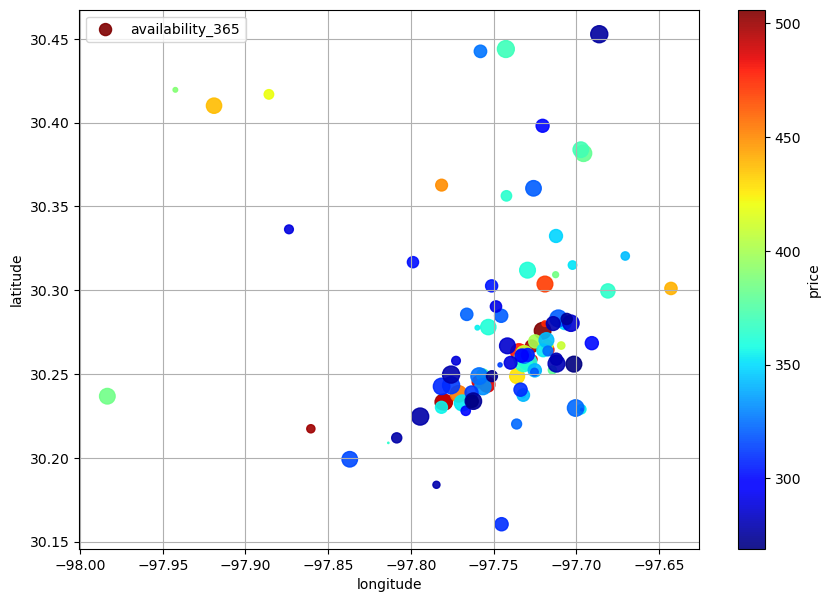

In [86]:
austin_result.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.9,
               s=austin_result["availability_365"], label="availability_365", 
               c="price", cmap="jet", colorbar=True, 
               legend=True, sharex=False, figsize=(10, 7))
plt.show()

## Resultados Dataframe completo

Si deseamos ver toda la información de los predios recomendados para invertir, podemos llamar la función pasando como parametro el dataframe original. 

In [87]:
# Llama a la función para filtrar el DataFrame
result = filter_dataframe(dataframe)
result

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
41,365471,https://www.airbnb.com/rooms/365471,20230610213056,2023-06-11,city scrape,Home in Austin · ★4.82 · 3 bedrooms · 4 beds ·...,CAN'T BEAT LOCATION & PRICE - A True East Aust...,Willow-Spence Historic District<br />Only a fe...,https://a0.muscache.com/pictures/26275478/b498...,1845598,https://www.airbnb.com/users/show/1845598,D.K.,2012-03-02,"Austin, TX",Born and raised in Texas then lived in NYC for...,within a few hours,100%,100%,t,https://a0.muscache.com/im/users/1845598/profi...,https://a0.muscache.com/im/users/1845598/profi...,East Downtown,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78702,NaN,30.25917,-97.73425,Entire home,Entire home/apt,8,NaN,2.5 baths,3.0,4.0,"[""Essentials"", ""Shampoo"", ""Microwave"", ""Cleani...",392.0,1,1125,1.0,3.0,1125.0,1125.0,1.6,1125.0,NaN,t,19,33,47,75,2023-06-11,104,5,0,2012-03-11,2023-04-16,4.82,4.83,4.82,4.98,4.99,4.80,4.65,NaN,f,1,1,0,0,0.76
79,76911,https://www.airbnb.com/rooms/76911,20230610213056,2023-06-11,city scrape,Home in Austin · ★4.96 · 5 bedrooms · 14 beds ...,This artistic oasis makes you feel like you ar...,No car necessary. 200 restaurants and nightspo...,https://a0.muscache.com/pictures/533355/fcf1bf...,394012,https://www.airbnb.com/users/show/394012,Cole,2011-02-15,"Austin, TX",Super Host- An attentive and grateful Inn keep...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/394012/profil...,https://a0.muscache.com/im/users/394012/profil...,East Downtown,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78702,NaN,30.26945,-97.72491,Entire home,Entire home/apt,14,NaN,3 baths,5.0,14.0,"[""Essentials"", ""Shampoo"", ""Microwave"", ""Dishes...",400.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,28,53,72,89,2023-06-11,201,23,2,2015-04-12,2023-06-04,4.96,4.95,4.89,4.99,4.99,4.93,4.88,NaN,f,1,1,0,0,2.02
112,687675,https://www.airbnb.com/rooms/687675,20230610213056,2023-06-11,previous scrape,Home in Austin · ★4.70 · 3 bedrooms · 3 beds ·...,Our 3/2 home is spacious and comfortable. It ...,Our neighborhood is very walkable. It is grea...,https://a0.muscache.com/pictures/9258508/ac61d...,3509782,https://www.airbnb.com/users/show/3509782,Meaghan,2012-09-08,"Austin, TX",My husband and I live in Austin. We have 3 aw...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/3509782/profi...,https://a0.muscache.com/im/users/3509782/profi...,Northwest Hills,1.0,2.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78731,NaN,30.35130,-97.76011,Entire home,Entire home/apt,8,NaN,2 baths,3.0,3.0,"[""Essentials"", ""Shampoo"", ""Microwave"", ""Dishes...",275.0,2,9,2.0,2.0,9.0,9.0,2.0,9.0,NaN,t,0,0,0,0,2023-06-11,67,0,0,2013-03-18,2020-02-28,4.

## Anexo para inversionistas

Como ultimo paso podemos generar el listado de url de las 125 propiedades recomendadas para inversión.

**NOTA:** El archivo queda guardado en la carpeta raiz en formato PDF.

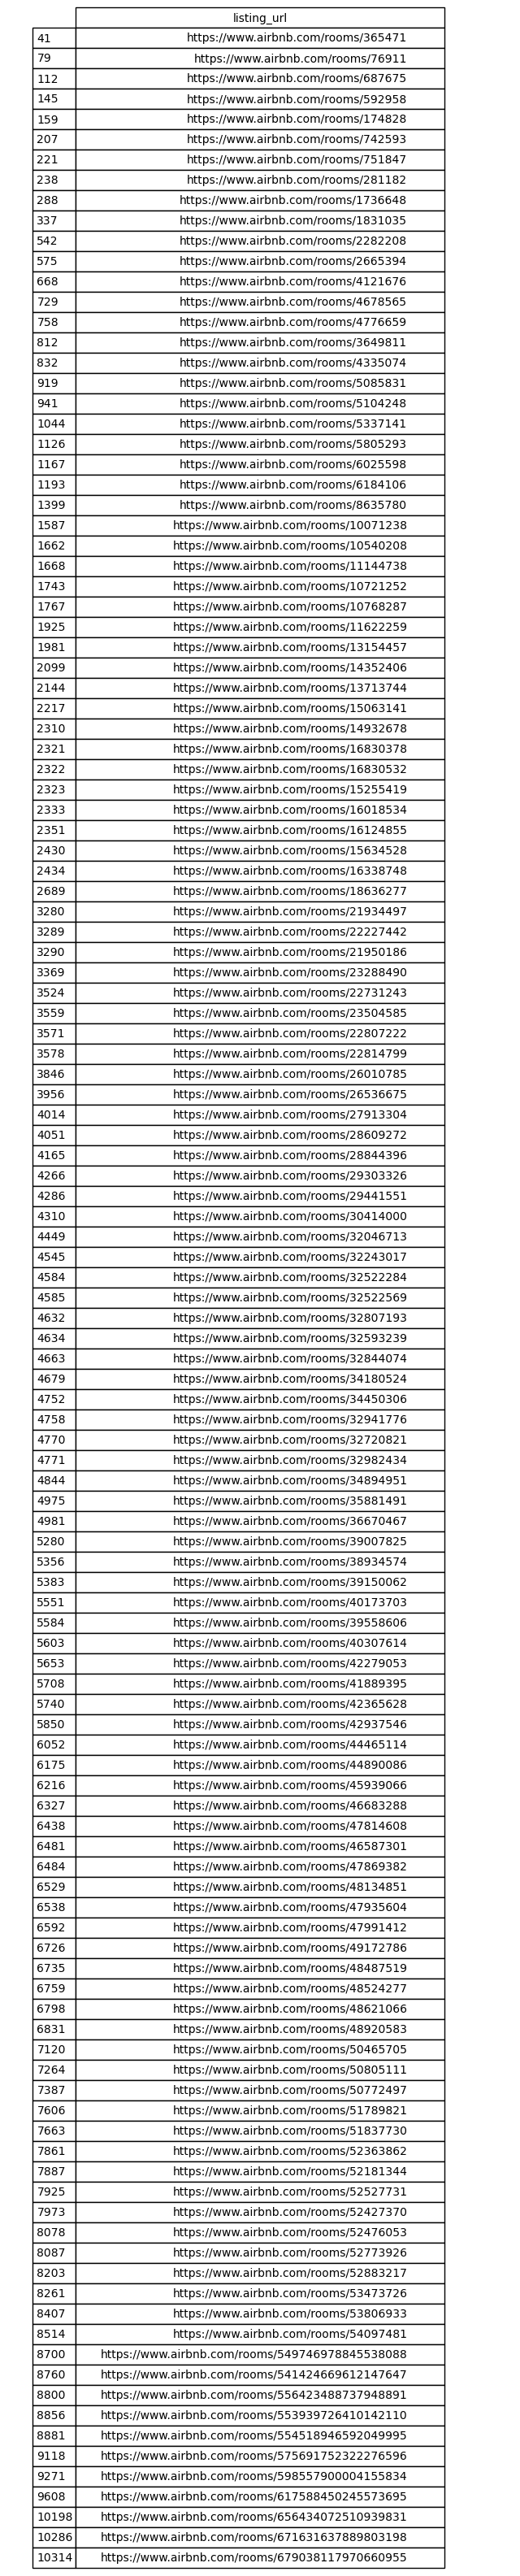

In [88]:
# Create a DataFrame containing only the column 'listing_url'.
df_listing_url = result[['listing_url']]

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.axis('off')

# Create a table with the 'listing_url' data and add it to the axis.
tbl = table(ax, df_listing_url, loc='center')

# Set the table format
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

# Adjust column width
tbl.auto_set_column_width([0])

# Create a PDF file and save the table in it
pdf_pages = PdfPages('listing_urls.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

# Gracias